In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('Final Dataset.xlsx', header=0)

In [2]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['top genre'])
y = data['top genre']

In [3]:
# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
data['top genre'] = label_encoder.fit_transform(data['top genre'])

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=['top genre'])
y = data['top genre']

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Convert all features to numeric values
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [8]:
# Handle missing values
X_train.fillna(0, inplace=True)  # Filling missing values with 0
X_test.fillna(0, inplace=True)

In [10]:
# Scale features to be between 0 and 1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train the Lasso Regression model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [12]:
# Predict genre for test data
y_pred = lasso.predict(X_test_scaled)

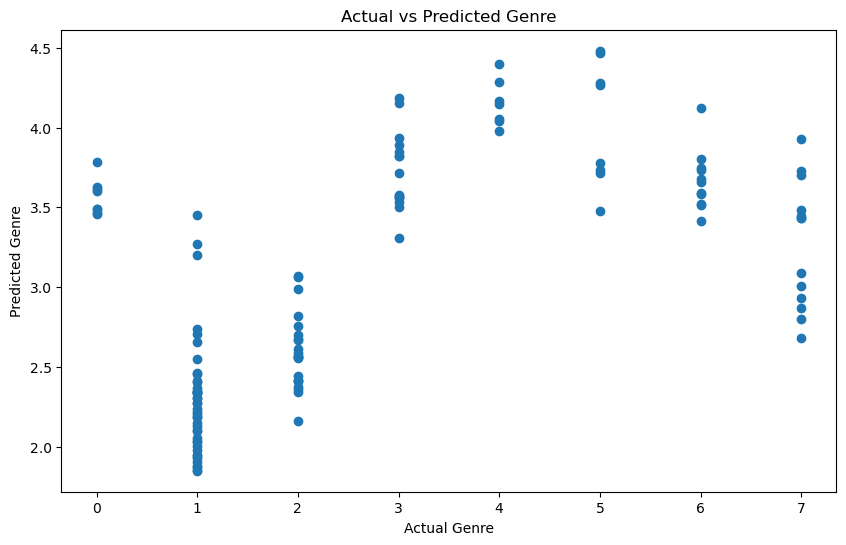

In [13]:
# Visualize the actual vs predicted genre
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Genre')
plt.ylabel('Predicted Genre')
plt.title('Actual vs Predicted Genre')
plt.show()